In [17]:
# Plot gamma distribution
%pylab inline
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


Max s
0.1590799391433519
percent s < 10^-5
1.1400000000000001
percent 10^-5 <= s < 10^-4
4.109999999999999
percent 10^-4 <= s < 10^-3
15.120000000000001
percent 10^-3 <= s < 10^-2
47.32
percent s >= 0.01
32.31
median
0.005165340326463998


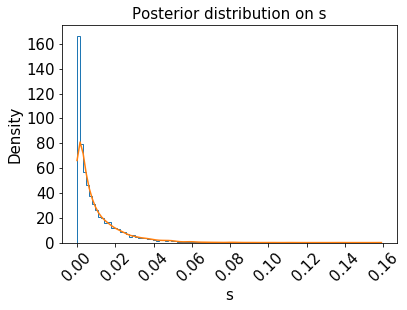

Text(0.5, 1.0, 'Gamma Distribution k=0.6100; theta=0.0160')

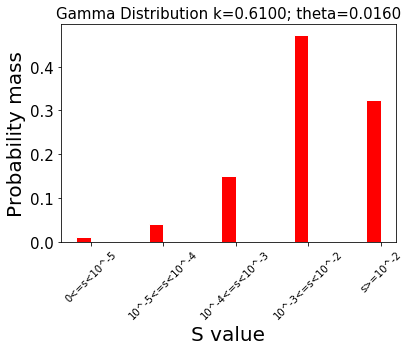

In [18]:
shape, scale =  0.61, 0.016#0.004, 2.5
beta = 1/scale
num_sims = 10000
s = []
for i in range(0, num_sims):
    s_val = np.random.gamma(shape, scale)
    if s_val > 1:
        print(s_val)
        s_val = 1
    
        
    s.append(s_val)
    
print("Max s")
print(max(s))

svals = [0, 0, 0, 0, 0]
for elem in s:
    if elem < 10**-5:
        svals[0] += 1
    elif elem < 10**-4:
        svals[1] += 1
    elif elem < 10**-3:
        svals[2] += 1
    elif elem < 10**-2:
        svals[3] += 1
    elif elem >= 10**-2:
        svals[4] += 1
print("percent s < 10^-5")
print(svals[0]/num_sims*100)
print("percent 10^-5 <= s < 10^-4")
print(svals[1]/num_sims*100)
print("percent 10^-4 <= s < 10^-3")
print(svals[2]/num_sims*100)
print("percent 10^-3 <= s < 10^-2")
print(svals[3]/num_sims*100)
print("percent s >= 0.01")
print(svals[4]/num_sims*100)
print('median')
print(np.median(s))

plt.figure(1)

density = stats.gaussian_kde(s)
n, x, _ = plt.hist(s, bins=100, 
                   histtype=u'step', density=True)
plt.plot(x, density(x))
#plt.hist(s, bins = 100, weights=np.ones(len(s)) / len(s)) # , bins=1000 weights=np.ones(len(s)) / len(s)
plt.xlabel("s", size = 15)
plt.ylabel("Density", size = 15)
plt.title("Posterior distribution on s", size=15)
#plt.savefig("/storage/BonnieH/selection_project/analysis/figures/gamma_distribution_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15)
plt.show()

plt.figure(2)
x = ['0<=s<10^-5', '10^-5<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
y_pos = np.arange(len(x))
    
barWidth = 0.2
r1 = np.arange(len(x))
total = sum(svals)
for i in range(0, len(svals)):
    svals[i] = svals[i]/total
plt.bar(r1, svals, color='red', width=barWidth, edgecolor='white', label='euro, eps = (obs_het + 0.0006)/3') #label='20k gens'
plt.xticks([r + barWidth/2 for r in range(len(x))], x)
plt.xticks(fontsize=10, rotation=45) # rotation=90
plt.yticks(fontsize=15)
    
plt.xlabel("S value", size=20)
plt.ylabel("Probability mass", size=20)

plt.title("Gamma Distribution k=%.4f; theta=%.4f"%(shape, scale), size=15) #: : \n ABC acceptance < 40%Trinucleotides Optimal Ru >= 9
#plt.savefig("/storage/BonnieH/selection_project/analysis/figures/gamma_distribution_bars_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')